In [ ]:
import pandas as pd
import numpy as np
import time, datetime, random
import os, itertools
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sys; sys.setrecursionlimit(10000)

In [ ]:
! pip install pingouin

In [ ]:
! pip install squarify

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# (1) 전세보증금반환보증 발급 현황

## (1) 전세보증상품 발급 건수

In [ ]:
df4 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/주택도시보증공사_전세보증금반환보증 발급현황_20230809.csv', encoding='cp949')
df4

,연도,월,구분,주택,보증유형,건수,금액(백만원),비율(건수기준_퍼센트)
0,2015,12,단독주택,단독주택,전세보증금반환보증,73,7983,1
1,2015,12,단독주택,다가구주택,전세보증금반환보증,76,8798,1
2,2015,12,공동주택,다세대주택,전세보증금반환보증,185,24670,2
3,2015,12,공동주택,연립주택,전세보증금반환보증,47,7476,0
4,2015,12,공동주택,오피스텔,전세보증금반환보증,108,12966,1
...,...,...,...,...,...,...,...,...
398,2023,6,공동주택,연립주택,전세자금대출특약보증,728,145144,1
399,2023,6,공동주택,다세대주택,전세자금대출특약보증,9539,1760912,18
400,2023,6,단독주택,단독주택,전세자금대출특약보증,963,157475,2
401,2023,6,단독주택,다가구주택,전세자금대출특약보증,2386,406628,4


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            403 non-null    int64 
 1   월             403 non-null    int64 
 2   구분            403 non-null    object
 3   주택            403 non-null    object
 4   보증유형          403 non-null    object
 5   건수            403 non-null    int64 
 6   금액(백만원)       403 non-null    int64 
 7   비율(건수기준_퍼센트)  403 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 25.3+ KB


In [ ]:
df4['보증유형'].unique()

array(['전세보증금반환보증', '전세자금대출특약보증'], dtype=object)

In [ ]:
df4['구분'].unique()

array(['단독주택', '공동주택'], dtype=object)

In [ ]:
df4['주택'].unique()

array(['단독주택', '다가구주택', '다세대주택', '연립주택', '오피스텔', '아파트', '노인복지주택', '다중주택'],
      dtype=object)

In [ ]:
# 필요없는 열 제거

df4 = df4.drop('비율(건수기준_퍼센트)', axis=1)
df4

,연도,월,구분,주택,보증유형,건수,금액(백만원)
0,2015,12,단독주택,단독주택,전세보증금반환보증,73,7983
1,2015,12,단독주택,다가구주택,전세보증금반환보증,76,8798
2,2015,12,공동주택,다세대주택,전세보증금반환보증,185,24670
3,2015,12,공동주택,연립주택,전세보증금반환보증,47,7476
4,2015,12,공동주택,오피스텔,전세보증금반환보증,108,12966
...,...,...,...,...,...,...,...
398,2023,6,공동주택,연립주택,전세자금대출특약보증,728,145144
399,2023,6,공동주택,다세대주택,전세자금대출특약보증,9539,1760912
400,2023,6,단독주택,단독주택,전세자금대출특약보증,963,157475
401,2023,6,단독주택,다가구주택,전세자금대출특약보증,2386,406628


In [ ]:
# 2016년 ~ 2022년 데이터

df4 = df4[df4['연도'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022])]
df4.reset_index(drop=True, inplace=True)
df4

,연도,월,구분,주택,보증유형,건수,금액(백만원)
0,2016,3,단독주택,단독주택,전세보증금반환보증,35,4461
1,2016,3,단독주택,다가구주택,전세보증금반환보증,41,5821
2,2016,3,공동주택,다세대주택,전세보증금반환보증,78,10905
3,2016,3,공동주택,연립주택,전세보증금반환보증,17,2984
4,2016,3,공동주택,오피스텔,전세보증금반환보증,23,4032
...,...,...,...,...,...,...,...
356,2022,12,공동주택,연립주택,전세자금대출특약보증,619,121854
357,2022,12,공동주택,다세대주택,전세자금대출특약보증,7562,1445670
358,2022,12,단독주택,단독주택,전세자금대출특약보증,768,131985
359,2022,12,단독주택,다가구주택,전세자금대출특약보증,1694,289023


In [ ]:
# 주택별 건수, 금액 합산하기

df4_1 = df4.groupby(['연도', '주택']).agg({'건수': 'sum', '금액(백만원)': 'sum'}).reset_index()
df4_1

,연도,주택,건수,금액(백만원)
0,2016,다가구주택,724,103922
1,2016,다세대주택,1517,205480
2,2016,단독주택,423,56758
3,2016,아파트,41568,7621361
4,2016,연립주택,286,39596
5,2016,오피스텔,220,33847
6,2017,다가구주택,3552,512758
7,2017,다세대주택,10684,1675253
8,2017,단독주택,1591,225311
9,2017,아파트,61900,12097130


In [ ]:
# 보증유형별 건수, 금액 합산하기

df4_2 = df4.groupby(['연도', '보증유형']).agg({'건수': 'sum', '금액(백만원)': 'sum'}).reset_index()
df4_2

,연도,보증유형,건수,금액(백만원)
0,2016,전세보증금반환보증,24461,5171600
1,2016,전세자금대출특약보증,20277,2889364
2,2017,전세보증금반환보증,43918,9493150
3,2017,전세자금대출특약보증,38697,5814713
4,2018,전세보증금반환보증,89351,19036698
5,2018,전세자금대출특약보증,76102,11505250
6,2019,전세보증금반환보증,156095,30644351
7,2019,전세자금대출특약보증,120209,16911806
8,2020,전세보증금반환보증,179374,37259486
9,2020,전세자금대출특약보증,128385,19446255


In [ ]:
# 총 발급 건수, 금액 합산하기

df4_3 = df4.groupby(['연도']).agg({'건수': 'sum', '금액(백만원)': 'sum'}).reset_index()
df4_3

,연도,건수,금액(백만원)
0,2016,44738,8060964
1,2017,82615,15307863
2,2018,165453,30541948
3,2019,276304,47556157
4,2020,307759,56705741
5,2021,269997,57519178
6,2022,237797,55450953


In [ ]:
sns.set_style('darkgrid')

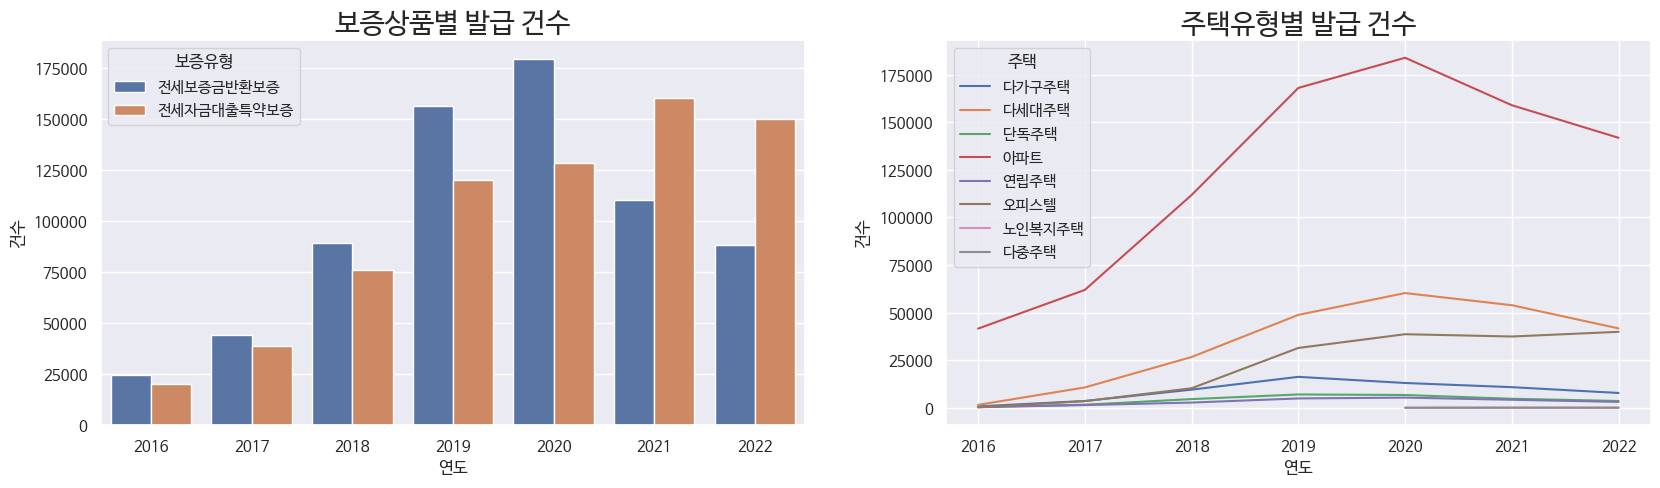

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(x='연도', y='건수', hue='보증유형', data=df4_2, ax=axes[0])
axes[0].set_title('보증상품별 발급 건수', fontsize=20)
axes[0].grid(True, axis='y')


sns.lineplot(x='연도', y='건수',hue='주택', data=df4_1, ax=axes[1])
axes[1].set_title('주택유형별 발급 건수', fontsize=20)
axes[1].grid(True, axis='y')

plt.show()

## (2) 전세보증금반환보증 상세 건수

In [ ]:
df3 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/주택도시보증공사_전세보증금반환보증 상세현황_20230809.csv', encoding='cp949')
df3

,상품명,발급년도,월,주택유형,지역,건수,보증금액
0,전세보증금반환보증,2016,1,다가구주택,경기도,2.0,230000000
1,전세보증금반환보증,2016,1,다가구주택,경상남도,1.0,70000000
2,전세보증금반환보증,2016,1,다가구주택,대구광역시,1.0,100000000
3,전세보증금반환보증,2016,1,다가구주택,대전광역시,1.0,200000000
4,전세보증금반환보증,2016,1,다가구주택,서울특별시,6.0,985000000
...,...,...,...,...,...,...,...
5745,전세보증금반환보증,2023,6,오피스텔,전남,40.0,4530500000
5746,전세보증금반환보증,2023,6,오피스텔,전북,22.0,3205000000
5747,전세보증금반환보증,2023,6,오피스텔,제주,21.0,3712800000
5748,전세보증금반환보증,2023,6,오피스텔,충남,142.0,22200890000


In [ ]:
# 이름 수정

df3.columns

Index(['상품명', '발급년도', '월', '주택유형', '지역', '건수', '보증금액  '], dtype='object')

In [ ]:
df3 = df3.rename(columns={'보증금액  ':'보증금액'})
df3.columns

Index(['상품명', '발급년도', '월', '주택유형', '지역', '건수', '보증금액'], dtype='object')

In [ ]:
df3['상품명'].unique()

array(['전세보증금반환보증'], dtype=object)

In [ ]:
df3['주택유형'].unique()

array(['다가구주택', '다세대주택', '단독주택', '아파트', '연립주택', '오피스텔', '노인복지주택', '다중주택',
       ' 노인복지주택 ', ' 다가구주택 ', ' 다세대주택 ', ' 다중주택 ', ' 단독주택 ', ' 아파트 ',
       ' 연립주택 ', ' 오피스텔 '], dtype=object)

In [ ]:
df3 = df3.replace(' 노인복지주택 ', '노인복지주택')
df3 = df3.replace(' 다가구주택 ', '다가구주택')
df3 = df3.replace(' 다세대주택 ', '다세대주택')
df3 = df3.replace(' 다중주택 ', '다중주택')
df3 = df3.replace(' 단독주택 ', '단독주택')
df3 = df3.replace(' 아파트 ', '아파트')
df3 = df3.replace(' 연립주택 ', '연립주택')
df3 = df3.replace(' 오피스텔 ', '오피스텔')
df3['주택유형'].unique()

array(['다가구주택', '다세대주택', '단독주택', '아파트', '연립주택', '오피스텔', '노인복지주택', '다중주택'],
      dtype=object)

In [ ]:
df3['지역'].unique()

array(['경기도', '경상남도', '대구광역시', '대전광역시', '서울특별시', '전라북도', '광주광역시', '부산광역시',
       '인천광역시', '충청북도', '강원도', '경상북도', '세종특별자치시', '울산광역시', '충청남도', '전라남도',
       '제주특별자치도', '서울', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
       '울산', '인천', '전남', '전북', '제주', '충남', '충북', '세종'], dtype=object)

In [ ]:
df3 = df3.replace('서울', '서울특별시')
df3 = df3.replace('강원', '강원도')
df3 = df3.replace('경기', '경기도')
df3 = df3.replace('경남', '경상남도')
df3 = df3.replace('경북', '경상북도')
df3 = df3.replace('광주', '광주광역시')
df3 = df3.replace('대구', '대구광역시')
df3 = df3.replace('대전', '대전광역시')
df3 = df3.replace('부산', '부산광역시')
df3 = df3.replace('울산', '울산광역시')
df3 = df3.replace('인천', '인천광역시')
df3 = df3.replace('전남', '전라남도')
df3 = df3.replace('전북', '전라북도')
df3 = df3.replace('제주', '제주특별자치도')
df3 = df3.replace('충남', '충청남도')
df3 = df3.replace('충북', '충청북도')
df3 = df3.replace('세종', '세종특별자치시')
df3['지역'].unique()

array(['경기도', '경상남도', '대구광역시', '대전광역시', '서울특별시', '전라북도', '광주광역시', '부산광역시',
       '인천광역시', '충청북도', '강원도', '경상북도', '세종특별자치시', '울산광역시', '충청남도', '전라남도',
       '제주특별자치도'], dtype=object)

In [ ]:
# null값 처리

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750 entries, 0 to 5749
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     5750 non-null   object 
 1   발급년도    5750 non-null   int64  
 2   월       5750 non-null   int64  
 3   주택유형    5750 non-null   object 
 4   지역      5750 non-null   object 
 5   건수      5729 non-null   float64
 6   보증금액    5730 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 314.6+ KB


In [ ]:
df3.isnull().sum()

상품명      0
발급년도     0
월        0
주택유형     0
지역       0
건수      21
보증금액    20
dtype: int64

In [ ]:
df3 = df3.dropna()
df3.isnull().sum()

상품명     0
발급년도    0
월       0
주택유형    0
지역      0
건수      0
보증금액    0
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5729 entries, 0 to 5749
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     5729 non-null   object 
 1   발급년도    5729 non-null   int64  
 2   월       5729 non-null   int64  
 3   주택유형    5729 non-null   object 
 4   지역      5729 non-null   object 
 5   건수      5729 non-null   float64
 6   보증금액    5729 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 358.1+ KB


In [ ]:
# 데이터 타입 변경

df3['보증금액'] = df3['보증금액'].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5729 entries, 0 to 5749
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     5729 non-null   object 
 1   발급년도    5729 non-null   int64  
 2   월       5729 non-null   int64  
 3   주택유형    5729 non-null   object 
 4   지역      5729 non-null   object 
 5   건수      5729 non-null   float64
 6   보증금액    5729 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 358.1+ KB


In [ ]:
# 2016년 ~ 2022년 데이터

df3 = df3[df3['발급년도'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022])]
df3.reset_index(drop=True, inplace=True)
df3

,상품명,발급년도,월,주택유형,지역,건수,보증금액
0,전세보증금반환보증,2016,1,다가구주택,경기도,2.0,2.300000e+08
1,전세보증금반환보증,2016,1,다가구주택,경상남도,1.0,7.000000e+07
2,전세보증금반환보증,2016,1,다가구주택,대구광역시,1.0,1.000000e+08
3,전세보증금반환보증,2016,1,다가구주택,대전광역시,1.0,2.000000e+08
4,전세보증금반환보증,2016,1,다가구주택,서울특별시,6.0,9.850000e+08
...,...,...,...,...,...,...,...
5516,전세보증금반환보증,2022,12,오피스텔,전라남도,15.0,1.915000e+09
5517,전세보증금반환보증,2022,12,오피스텔,전라북도,19.0,2.892500e+09
5518,전세보증금반환보증,2022,12,오피스텔,제주특별자치도,7.0,1.227000e+09
5519,전세보증금반환보증,2022,12,오피스텔,충청남도,87.0,1.724530e+10


In [ ]:
# 건수, 금액 합산하기

df3_1 = df3.groupby(['발급년도', '주택유형', '지역']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_1

,발급년도,주택유형,지역,건수,보증금액
0,2016,다가구주택,강원도,1.0,8.000000e+07
1,2016,다가구주택,경기도,218.0,3.824950e+10
2,2016,다가구주택,경상남도,12.0,1.247000e+09
3,2016,다가구주택,경상북도,2.0,6.500000e+07
4,2016,다가구주택,광주광역시,1.0,1.330000e+08
...,...,...,...,...,...
703,2022,오피스텔,전라남도,88.0,1.006150e+10
704,2022,오피스텔,전라북도,65.0,8.742700e+09
705,2022,오피스텔,제주특별자치도,23.0,3.713400e+09
706,2022,오피스텔,충청남도,320.0,5.601312e+10


In [ ]:
# 전세보증금반환보증을 발급한 연도별 건수, 보증금액

df3_2 = df3_1.groupby(['발급년도']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_2

,발급년도,건수,보증금액
0,2016,24460.0,5.170407e+12
1,2017,43918.0,9.493301e+12
2,2018,89351.0,1.903669e+13
3,2019,156095.0,3.064339e+13
4,2020,179374.0,3.726733e+13
5,2021,152392.0,3.362719e+13
6,2022,88151.0,2.064616e+13


In [ ]:
# 전세보증금반환보증을 발급한 지역별 건수, 보증금액

df3_4 = df3_1.groupby(['발급년도', '지역']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_4

,발급년도,지역,건수,보증금액
0,2016,강원도,70.0,1.083460e+10
1,2016,경기도,12044.0,2.664137e+12
2,2016,경상남도,484.0,7.472830e+10
3,2016,경상북도,307.0,4.748410e+10
4,2016,광주광역시,193.0,3.641655e+10
...,...,...,...,...
114,2022,전라남도,1378.0,2.480540e+11
115,2022,전라북도,2480.0,4.925177e+11
116,2022,제주특별자치도,404.0,8.252365e+10
117,2022,충청남도,3430.0,6.470391e+11


In [ ]:
# 수도권, 서울, 전국으로 나누기

df3_5 = df3_1[df3_1['지역'].isin(['경기도', '서울특별시', '인천광역시'])]
df3_6 = df3_1[df3_1['지역'].isin(['서울특별시'])]
df3_7 = df3_1[df3_1['지역'].isin(['경기도', '경상남도', '대구광역시', '대전광역시', '서울특별시', '전라북도', '광주광역시', '부산광역시',
       '인천광역시', '충청북도', '강원도', '경상북도', '세종특별자치시', '울산광역시', '충청남도', '전라남도',
       '제주특별자치도'])]

In [ ]:
# 수도권

df3_5_1 = df3_5.groupby(['발급년도']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_5_1

,발급년도,건수,보증금액
0,2016,19999.0,4.410988e+12
1,2017,33793.0,7.654792e+12
2,2018,69819.0,1.564965e+13
3,2019,118789.0,2.477727e+13
4,2020,136093.0,2.974805e+13
5,2021,105709.0,2.463940e+13
6,2022,52019.0,1.337671e+13


In [ ]:
# 서울

df3_6_1 = df3_6.groupby(['발급년도']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_6_1

,발급년도,건수,보증금액
0,2016,3728.0,8.506277e+11
1,2017,11272.0,2.734256e+12
2,2018,25980.0,6.350234e+12
3,2019,43767.0,1.018762e+13
4,2020,48930.0,1.160227e+13
5,2021,38769.0,9.370799e+12
6,2022,20866.0,5.465321e+12


In [ ]:
# 전국

df3_7_1 = df3_7.groupby(['발급년도']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_7_1

,발급년도,건수,보증금액
0,2016,24460.0,5.170407e+12
1,2017,43918.0,9.493301e+12
2,2018,89351.0,1.903669e+13
3,2019,156095.0,3.064339e+13
4,2020,179374.0,3.726733e+13
5,2021,152392.0,3.362719e+13
6,2022,88151.0,2.064616e+13


In [ ]:
# 2022년 주택별 발급 건수

df3_8 = df3_1[df3_1['발급년도'].isin([2022])]
df3_8 = df3_8[df3_8['주택유형'].isin(['아파트', '오피스텔', '다세대주택'])]
df3_8

,발급년도,주택유형,지역,건수,보증금액
617,2022,다세대주택,강원도,12.0,1.130000e+09
618,2022,다세대주택,경기도,2433.0,4.330753e+11
619,2022,다세대주택,경상남도,60.0,6.781500e+09
620,2022,다세대주택,경상북도,58.0,5.438400e+09
621,2022,다세대주택,광주광역시,6.0,1.457000e+09
622,2022,다세대주택,대구광역시,58.0,7.601500e+09
623,2022,다세대주택,대전광역시,33.0,4.670900e+09
624,2022,다세대주택,부산광역시,260.0,2.852625e+10
625,2022,다세대주택,서울특별시,7378.0,1.722000e+12
626,2022,다세대주택,세종특별자치시,1.0,1.050000e+08


In [ ]:
# 수도권, 서울, 전국으로 나누기

df3_8_1 = df3_8[df3_8['지역'].isin(['경기도', '서울특별시', '인천광역시'])]
df3_8_2 = df3_8[df3_8['지역'].isin(['서울특별시'])]
df3_8_3 = df3_8[df3_8['지역'].isin(['경기도', '경상남도', '대구광역시', '대전광역시', '서울특별시', '전라북도', '광주광역시', '부산광역시',
       '인천광역시', '충청북도', '강원도', '경상북도', '세종특별자치시', '울산광역시', '충청남도', '전라남도',
       '제주특별자치도'])]

In [ ]:
# 2022 수도권

df3_8_1['지역'] = df3_8_1['지역'].replace({'경기도': '수도권', '서울특별시': '수도권', '인천광역시': '수도권'})
df3_8_1 = df3_8_1.groupby(['주택유형', '지역']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_8_1

<ipython-input-146-dd6d48d8cd22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_8_1['지역'] = df3_8_1['지역'].replace({'경기도': '수도권', '서울특별시': '수도권', '인천광역시': '수도권'})


,주택유형,지역,건수,보증금액
0,다세대주택,수도권,11250.0,2.324213e+12
1,아파트,수도권,24617.0,8.008000e+12
2,오피스텔,수도권,14784.0,2.777902e+12


In [ ]:
# 2022 서울

df3_8_2['지역'] = df3_8_2['지역'].replace({'서울특별시': '서울'})
df3_8_2 = df3_8_2.groupby(['주택유형', '지역']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_8_2

<ipython-input-147-1aa01398ed20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_8_2['지역'] = df3_8_2['지역'].replace({'서울특별시': '서울'})


,주택유형,지역,건수,보증금액
0,다세대주택,서울,7378.0,1.722000e+12
1,아파트,서울,5595.0,2.110000e+12
2,오피스텔,서울,7267.0,1.514000e+12


In [ ]:
# 2022 전국

df3_8_3['지역'] = df3_8_3['지역'].replace({'경기도': '전국', '경상남도': '전국', '대구광역시': '전국', '대전광역시': '전국', '서울특별시': '전국',
                                       '전라북도': '전국', '광주광역시': '전국', '부산광역시': '전국', '인천광역시': '전국', '충청북도': '전국', '강원도': '전국',
                                       '경상북도': '전국', '세종특별자치시': '전국', '울산광역시': '전국', '충청남도': '전국', '전라남도': '전국','제주특별자치도': '전국'})
df3_8_3 = df3_8_3.groupby(['주택유형', '지역']).agg({'건수': 'sum', '보증금액': 'sum'}).reset_index()
df3_8_3

,주택유형,지역,건수,보증금액
0,다세대주택,전국,11961.0,2.411247e+12
1,아파트,전국,55975.0,1.467048e+13
2,오피스텔,전국,17705.0,3.178771e+12


In [ ]:
# 각 데이터프레임에 "level_0" 컬럼 추가
df3_5_1['level_0'] = '수도권'
df3_6_1['level_0'] = '서울'
df3_7_1['level_0'] = '전국'

# 데이터프레임을 하나로 합치기
merged_df1 = pd.concat([df3_5_1, df3_6_1, df3_7_1])
merged_df2 = pd.concat([df3_8_1, df3_8_2, df3_8_3])

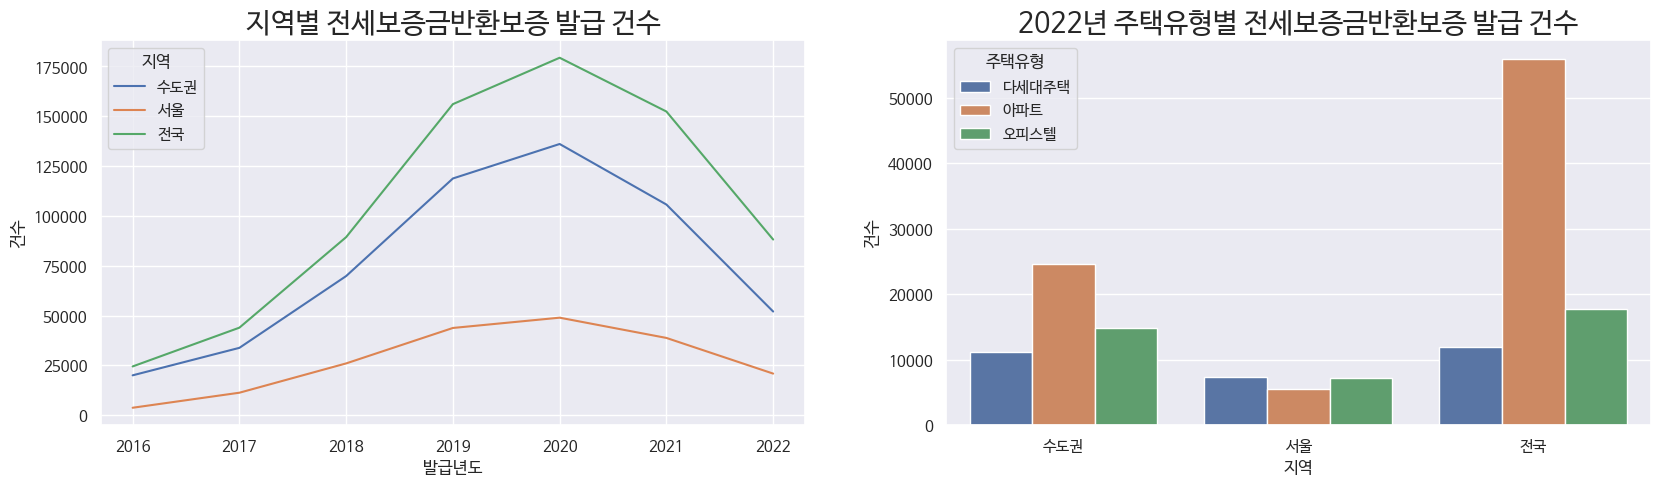

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.lineplot(x='발급년도', y='건수', hue='level_0', data=merged_df1, ax=axes[0])
axes[0].set_title('지역별 전세보증금반환보증 발급 건수', fontsize=20)
axes[0].legend(title='지역', loc='upper left')


sns.barplot(x='지역', y='건수', hue='주택유형', data=merged_df2)
axes[1].set_title('2022년 주택유형별 전세보증금반환보증 발급 건수', fontsize=20)
axes[1].grid(True, axis='y')


plt.show()

# (2) 전세보증사고(전세보증금반환보증, 전세대출특약보증) 현황

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/주택도시보증공사_보증사고현황_20221231.csv', encoding='cp949')
df

,연도,보증종류,건수,금액(억원)
0,2016,주택분양보증,2,517.0
1,2016,주택임대보증,0,0.0
2,2016,주상복합분양보증,0,0.0
3,2016,조합주택시공보증,3,502.0
4,2016,하자보수보증,11,13.0
...,...,...,...,...
149,2022,기금전세자금대출,0,0.0
150,2022,전세보증금반환보증,5443,11726.0
151,2022,전세대출특약보증,1109,1485.0
152,2022,전세임대사업 임차료지급보증,86,2.0


In [ ]:
df.info()  # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      154 non-null    int64  
 1   보증종류    154 non-null    object 
 2   건수      154 non-null    int64  
 3   금액(억원)  154 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.9+ KB


In [ ]:
df['보증종류'].unique()

array(['주택분양보증', '주택임대보증', '주상복합분양보증', '조합주택시공보증', '하자보수보증', '인허가보증',
       '감리비예치보증', '임대보증금보증', 'PF보증', '하도급보증', '모기지보증', '주택구입자금보증',
       '주택임차자금보증', '정비사업자금', '리모델링자금', '전세임대주택반환', '기금전세자금대출',
       '전세보증금반환보증', '전세대출특약보증', '전세임대사업 임차료지급보증', '임대주택매입자금보증',
       '수요자중심형 도시재생지원자금', '주상복합주택분양보증', '하도급대금지급보증', '수요자중심형 도시재생지원자금보증',
       '도시재생사업 PF보증', '정비사업자급대출보증', '리모델링자금보증'], dtype=object)

In [ ]:
# 전세보증금반환보증, 전세대출특약보증 데이터만 뽑기

df_1 = df[df['보증종류'].isin(['전세보증금반환보증', '전세대출특약보증'])]
df_1.reset_index(drop=True, inplace=True)
df_1

,연도,보증종류,건수,금액(억원)
0,2016,전세보증금반환보증,27,34.0
1,2016,전세대출특약보증,31,32.0
2,2017,전세보증금반환보증,33,74.0
3,2017,전세대출특약보증,53,77.0
4,2018,전세보증금반환보증,372,792.0
5,2018,전세대출특약보증,203,286.0
6,2019,전세보증금반환보증,1630,3442.0
7,2019,전세대출특약보증,509,752.0
8,2020,전세보증금반환보증,2408,4682.0
9,2020,전세대출특약보증,886,1257.0


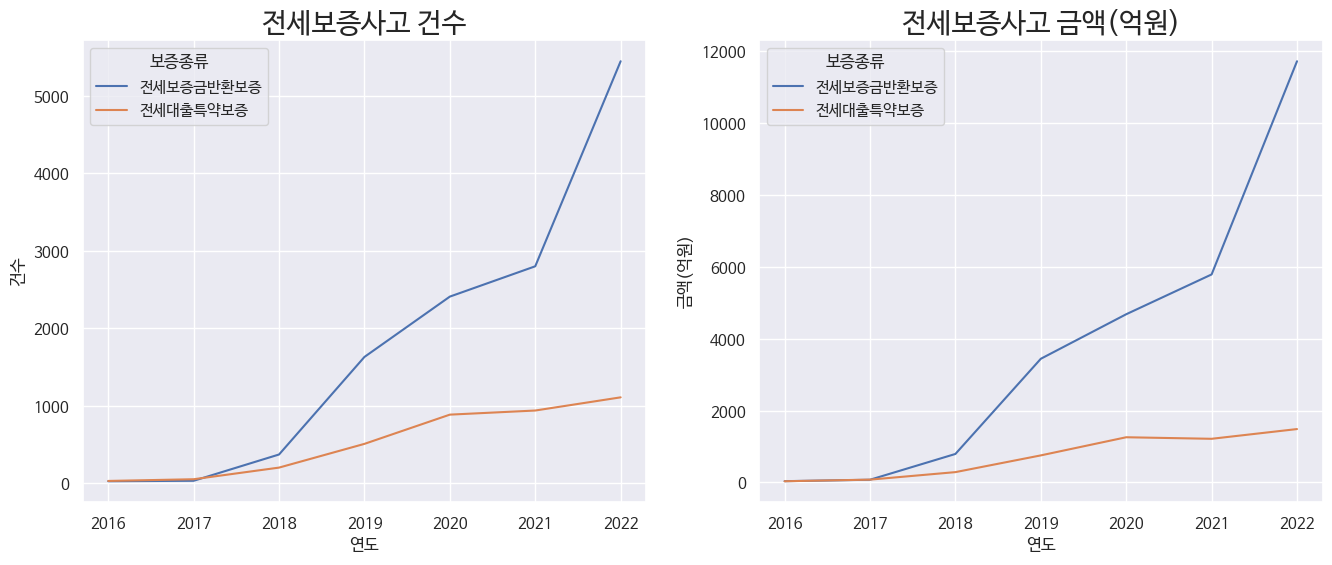

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.lineplot(x='연도', y='건수', hue='보증종류', data=df_1, ax=axes[0])
axes[0].set_title('전세보증사고 건수', fontsize=20)


sns.lineplot(x='연도', y='금액(억원)', hue='보증종류', data=df_1, ax=axes[1])
axes[1].set_title('전세보증사고 금액(억원)', fontsize=20)


plt.show()

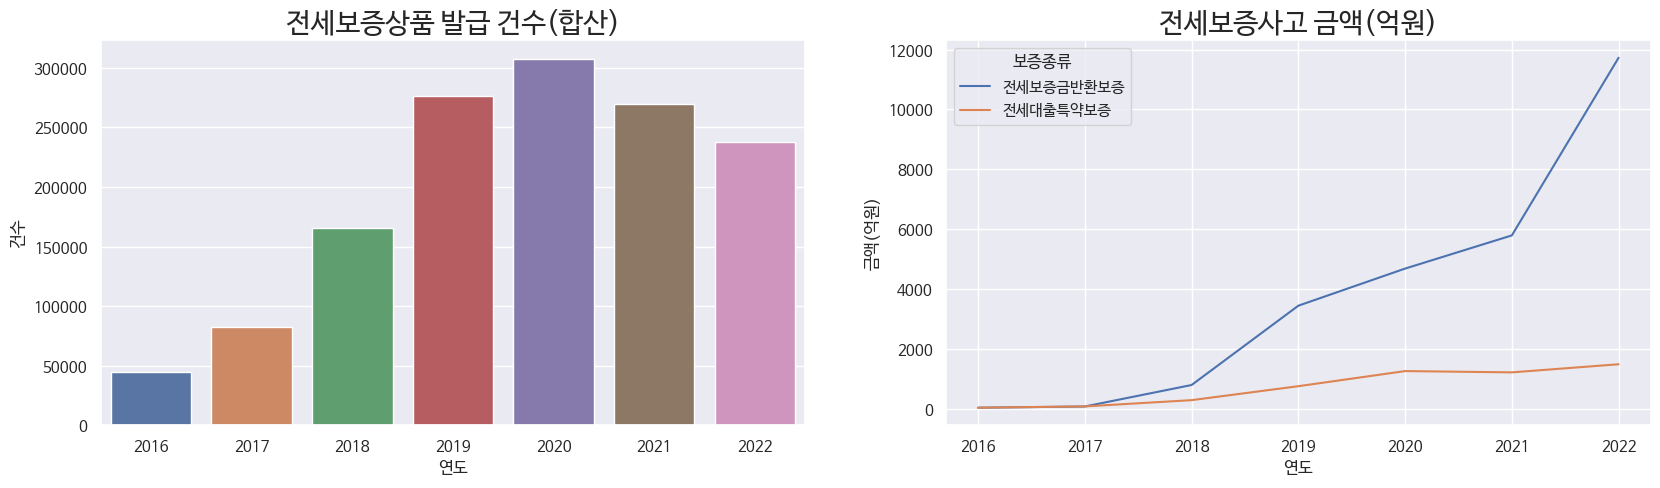

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(x='연도', y='건수', data=df4_3, ax=axes[0])
axes[0].set_title('전세보증상품 발급 건수(합산)', fontsize=20)
axes[0].grid(True, axis='y')


sns.lineplot(x='연도', y='금액(억원)', hue='보증종류', data=df_1, ax=axes[1])
axes[1].set_title('전세보증사고 금액(억원)', fontsize=20)
axes[1].grid(True, axis='y')

plt.show()

# (3) 아파트 전세평균가격 현황

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/지역별_아파트_전세_평균가격.CSV', encoding='cp949')
df2

,지 역,2014년 01월,2014년 02월,2014년 03월,2014년 04월,2014년 05월,2014년 06월,2014년 07월,2014년 08월,2014년 09월,...,2022년 12월,2023년 01월,2023년 02월,2023년 03월,2023년 04월,2023년 05월,2023년 06월,2023년 07월,2023년 08월,2023년 09월
0,전국,263.7,261.5,256.0,256.9,258.9,260.9,263.4,267.1,268.0,...,443.2,426.5,423.6,425.6,428.9,435.0,443.4,449.3,448.4,456.7
1,수도권,303.6,299.8,293.1,294.0,295.2,299.5,301.9,305.8,306.8,...,528.2,506.9,497.7,495.8,499.7,507.3,516.5,524.7,525.3,535.5
2,지방,178.2,173.0,172.5,173.1,174.8,176.4,178.2,178.6,180.8,...,281.6,273.8,272.2,268.7,270.9,272.6,276.1,277.5,280.2,282.7
3,서울,391.5,384.7,380.9,383.4,382.9,388.7,392.6,397.3,395.5,...,740.9,715.7,692.7,690.7,689.0,696.3,711.4,727.6,729.8,743.8
4,부산,206.7,203.1,203.1,202.7,206.6,209.3,213.2,215.1,213.3,...,319.8,313.7,316.9,314.0,311.5,314.5,316.8,313.9,315.5,316.8
5,대구,203.7,207.5,205.8,210.2,215.5,222.3,215.9,224.9,229.5,...,311.8,299.1,289.6,282.5,276.7,281.5,288.3,289.2,294.0,302.4
6,인천,181.6,186.1,180.9,184.0,184.9,187.3,188.8,191.3,193.1,...,323.2,317.5,313.2,311.6,313.6,316.2,323.0,326.5,331.2,329.1
7,광주,166.5,159.1,161.7,158.7,164.6,171.2,171.1,165.1,172.4,...,295.4,286.3,286.2,275.7,286.6,279.1,280.6,287.2,291.1,292.4
8,대전,201.9,196.7,190.8,185.1,185.1,187.9,189.0,191.4,188.1,...,314.5,302.4,301.8,299.1,299.2,296.3,308.7,315.0,322.8,319.7
9,울산,207.7,202.1,200.5,201.2,206.1,197.1,200.6,206.5,201.3,...,287.9,287.2,276.7,279.2,283.2,278.9,280.5,290.7,283.5,275.1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 118 entries, 지 역 to 2023년 09월
dtypes: float64(117), object(1)
memory usage: 18.6+ KB


In [ ]:
df2.columns

Index(['지 역', '2014년 01월', '2014년 02월', '2014년 03월', '2014년 04월', '2014년 05월',
       '2014년 06월', '2014년 07월', '2014년 08월', '2014년 09월',
       ...
       '2022년 12월', '2023년 01월', '2023년 02월', '2023년 03월', '2023년 04월',
       '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월'],
      dtype='object', length=118)

In [ ]:
# 2016년 ~ 2022년 데이터

df2_1 = df2.drop(['2014년 01월', '2014년 02월', '2014년 03월', '2014년 04월', '2014년 05월', '2014년 06월', '2014년 07월', '2014년 08월', '2014년 09월', '2014년 10월', '2014년 11월', '2014년 12월',
               '2015년 01월', '2015년 02월', '2015년 03월', '2015년 04월', '2015년 05월', '2015년 06월', '2015년 07월', '2015년 08월', '2015년 09월', '2015년 10월', '2015년 11월', '2015년 12월',
                '2023년 01월', '2023년 02월', '2023년 03월', '2023년 04월', '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월'], axis=1)
df2_1

,지 역,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
0,전국,320.0,315.2,311.0,314.1,320.6,327.4,330.4,335.9,343.1,...,456.4,461.4,468.0,468.2,470.9,465.3,463.7,455.9,442.8,443.2
1,수도권,385.1,378.8,366.8,371.2,378.7,384.8,388.9,393.6,399.8,...,538.0,541.7,553.8,552.9,551.0,542.5,542.9,537.9,525.9,528.2
2,지방,211.0,205.8,204.3,207.1,205.6,210.6,210.9,210.7,217.1,...,300.5,304.5,301.9,305.8,303.3,302.1,300.7,296.0,288.9,281.6
3,서울,492.9,483.2,470.8,481.6,485.0,498.3,497.2,501.1,507.9,...,721.8,742.9,757.0,756.8,757.9,755.5,759.0,756.3,744.8,740.9
4,부산,258.6,254.4,250.7,251.3,256.0,263.4,268.1,271.5,272.8,...,356.2,357.0,354.2,359.8,361.2,355.3,353.3,348.3,333.7,319.8
5,대구,257.5,257.0,247.5,246.1,244.3,241.1,235.1,230.0,246.1,...,361.6,357.3,349.7,347.6,339.5,336.5,331.2,326.0,317.9,311.8
6,인천,258.0,255.8,250.6,250.9,250.0,256.5,266.8,267.5,275.1,...,375.6,372.2,372.1,376.5,366.6,360.4,353.8,344.6,334.0,323.2
7,광주,204.9,205.5,197.2,208.4,209.2,209.3,215.0,214.6,213.4,...,295.9,308.6,299.0,311.8,303.6,303.9,302.4,290.1,291.7,295.4
8,대전,218.9,212.5,212.3,211.9,213.3,218.7,217.8,223.4,223.7,...,333.9,338.2,332.5,334.3,328.2,327.4,330.5,326.5,322.0,314.5
9,울산,232.4,230.6,229.2,232.1,232.2,231.6,233.0,228.6,238.8,...,326.3,326.4,333.4,328.3,315.2,322.3,312.1,309.2,297.2,287.9


In [ ]:
# 전국, 수도권, 지방, 서울

df2_2 = df2_1.loc[[0, 1, 2, 3], :]
df2_2.reset_index(drop=True, inplace=True)
df2_2

,지 역,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
0,전국,320.0,315.2,311.0,314.1,320.6,327.4,330.4,335.9,343.1,...,456.4,461.4,468.0,468.2,470.9,465.3,463.7,455.9,442.8,443.2
1,수도권,385.1,378.8,366.8,371.2,378.7,384.8,388.9,393.6,399.8,...,538.0,541.7,553.8,552.9,551.0,542.5,542.9,537.9,525.9,528.2
2,지방,211.0,205.8,204.3,207.1,205.6,210.6,210.9,210.7,217.1,...,300.5,304.5,301.9,305.8,303.3,302.1,300.7,296.0,288.9,281.6
3,서울,492.9,483.2,470.8,481.6,485.0,498.3,497.2,501.1,507.9,...,721.8,742.9,757.0,756.8,757.9,755.5,759.0,756.3,744.8,740.9


In [ ]:
df2_3 = df2_2.groupby('지 역').mean()
df2_3

,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,2016년 10월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
지 역,,,,,,,,,,,,,,,,,,,,,
서울,492.9,483.2,470.8,481.6,485.0,498.3,497.2,501.1,507.9,520.3,...,721.8,742.9,757.0,756.8,757.9,755.5,759.0,756.3,744.8,740.9
수도권,385.1,378.8,366.8,371.2,378.7,384.8,388.9,393.6,399.8,410.3,...,538.0,541.7,553.8,552.9,551.0,542.5,542.9,537.9,525.9,528.2
전국,320.0,315.2,311.0,314.1,320.6,327.4,330.4,335.9,343.1,348.6,...,456.4,461.4,468.0,468.2,470.9,465.3,463.7,455.9,442.8,443.2
지방,211.0,205.8,204.3,207.1,205.6,210.6,210.9,210.7,217.1,219.7,...,300.5,304.5,301.9,305.8,303.3,302.1,300.7,296.0,288.9,281.6


In [ ]:
df2_3.columns

Index(['2016년 01월', '2016년 02월', '2016년 03월', '2016년 04월', '2016년 05월',
       '2016년 06월', '2016년 07월', '2016년 08월', '2016년 09월', '2016년 10월',
       '2016년 11월', '2016년 12월', '2017년 01월', '2017년 02월', '2017년 03월',
       '2017년 04월', '2017년 05월', '2017년 06월', '2017년 07월', '2017년 08월',
       '2017년 09월', '2017년 10월', '2017년 11월', '2017년 12월', '2018년 01월',
       '2018년 02월', '2018년 03월', '2018년 04월', '2018년 05월', '2018년 06월',
       '2018년 07월', '2018년 08월', '2018년 09월', '2018년 10월', '2018년 11월',
       '2018년 12월', '2019년 01월', '2019년 02월', '2019년 03월', '2019년 04월',
       '2019년 05월', '2019년 06월', '2019년 07월', '2019년 08월', '2019년 09월',
       '2019년 10월', '2019년 11월', '2019년 12월', '2020년 01월', '2020년 02월',
       '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월', '2020년 07월',
       '2020년 08월', '2020년 09월', '2020년 10월', '2020년 11월', '2020년 12월',
       '2021년 01월', '2021년 02월', '2021년 03월', '2021년 04월', '2021년 05월',
       '2021년 06월', '2021년 07월', '2021년 08월', '2021년 09월', '2021

In [ ]:
# 2016년 평균

md_2016 = df2_3.iloc[:, 0:12]
ma_2016 = md_2016.mean(axis=1).round(0)
ma_2016

지 역
서울     500.0
수도권    392.0
전국     331.0
지방     212.0
dtype: float64

In [ ]:
# 2017년 평균

md_2017 = df2_3.iloc[:, 12:24]
ma_2017 = md_2017.mean(axis=1).round(0)
ma_2017

지 역
서울     539.0
수도권    421.0
전국     350.0
지방     219.0
dtype: float64

In [ ]:
# 2018년 평균

md_2018 = df2_3.iloc[:, 24:36]
ma_2018 = md_2018.mean(axis=1).round(0)
ma_2018

지 역
서울     577.0
수도권    433.0
전국     359.0
지방     221.0
dtype: float64

In [ ]:
# 2019년 평균

md_2019 = df2_3.iloc[:, 36:48]
ma_2019 = md_2019.mean(axis=1).round(0)
ma_2019

지 역
서울     591.0
수도권    435.0
전국     360.0
지방     227.0
dtype: float64

In [ ]:
# 2020년 평균

md_2020 = df2_3.iloc[:, 48:60]
ma_2020 = md_2020.mean(axis=1).round(0)
ma_2020

지 역
서울     662.0
수도권    488.0
전국     407.0
지방     261.0
dtype: float64

In [ ]:
# 2021년 평균

md_2021 = df2_3.iloc[:, 60:72]
ma_2021 = md_2021.mean(axis=1).round(0)
ma_2021

지 역
서울     748.0
수도권    547.0
전국     457.0
지방     294.0
dtype: float64

In [ ]:
# 2022년 평균

md_2022 = df2_3.iloc[:, 72:84]
ma_2022 = md_2022.mean(axis=1).round(0)
ma_2022

지 역
서울     748.0
수도권    544.0
전국     460.0
지방     300.0
dtype: float64

In [ ]:
# 연도별 평균 전세가격지수

df2_2.insert(loc=1, column='2016', value=[331, 392, 212, 500])
df2_2.insert(loc=2, column='2017', value=[350, 421, 219, 539])
df2_2.insert(loc=3, column='2018', value=[359, 433, 221, 577])
df2_2.insert(loc=4, column='2019', value=[360, 435, 227, 591])
df2_2.insert(loc=5, column='2020', value=[407, 488, 261, 662])
df2_2.insert(loc=6, column='2021', value=[457, 547, 294, 748])
df2_2.insert(loc=7, column='2022', value=[460, 544, 300, 748])
df2_2

,지 역,2016,2017,2018,2019,2020,2021,2022,2016년 01월,2016년 02월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
0,전국,331,350,359,360,407,457,460,320.0,315.2,...,456.4,461.4,468.0,468.2,470.9,465.3,463.7,455.9,442.8,443.2
1,수도권,392,421,433,435,488,547,544,385.1,378.8,...,538.0,541.7,553.8,552.9,551.0,542.5,542.9,537.9,525.9,528.2
2,지방,212,219,221,227,261,294,300,211.0,205.8,...,300.5,304.5,301.9,305.8,303.3,302.1,300.7,296.0,288.9,281.6
3,서울,500,539,577,591,662,748,748,492.9,483.2,...,721.8,742.9,757.0,756.8,757.9,755.5,759.0,756.3,744.8,740.9


In [ ]:
df2_4 = df2_2.iloc[:, :8]
df2_4

,지 역,2016,2017,2018,2019,2020,2021,2022
0,전국,331,350,359,360,407,457,460
1,수도권,392,421,433,435,488,547,544
2,지방,212,219,221,227,261,294,300
3,서울,500,539,577,591,662,748,748


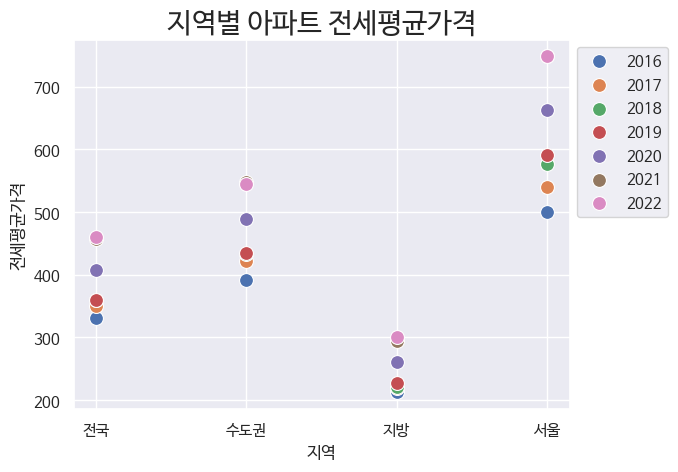

In [ ]:
sns.scatterplot(x='지 역', y='2016', data=df2_4, label='2016', s=100)
sns.scatterplot(x='지 역', y='2017', data=df2_4, label='2017', s=100)
sns.scatterplot(x='지 역', y='2018', data=df2_4, label='2018', s=100)
sns.scatterplot(x='지 역', y='2019', data=df2_4, label='2019', s=100)
sns.scatterplot(x='지 역', y='2020', data=df2_4, label='2020', s=100)
sns.scatterplot(x='지 역', y='2021', data=df2_4, label='2021', s=100)
sns.scatterplot(x='지 역', y='2022', data=df2_4, label='2022', s=100)
plt.xlabel('지역')
plt.ylabel('전세평균가격')
plt.title('지역별 아파트 전세평균가격', fontsize=20)
plt.legend(loc=2, bbox_to_anchor=(1, 1))

plt.show()

# (4) 전세보증사고와 아파트 전세평균가격의 상관관계

In [ ]:
df_1

,연도,보증종류,건수,금액(억원)
0,2016,전세보증금반환보증,27,34.0
1,2016,전세대출특약보증,31,32.0
2,2017,전세보증금반환보증,33,74.0
3,2017,전세대출특약보증,53,77.0
4,2018,전세보증금반환보증,372,792.0
5,2018,전세대출특약보증,203,286.0
6,2019,전세보증금반환보증,1630,3442.0
7,2019,전세대출특약보증,509,752.0
8,2020,전세보증금반환보증,2408,4682.0
9,2020,전세대출특약보증,886,1257.0


In [ ]:
df2_4

,지 역,2016,2017,2018,2019,2020,2021,2022
0,전국,331,350,359,360,407,457,460
1,수도권,392,421,433,435,488,547,544
2,지방,212,219,221,227,261,294,300
3,서울,500,539,577,591,662,748,748


In [ ]:
# 전세보증사고 건수, 금액 합산하기

co1 = df_1.groupby(['연도']).agg({'건수': 'sum', '금액(억원)': 'sum'}).reset_index()
co1

,연도,건수,금액(억원)
0,2016,58,66.0
1,2017,86,151.0
2,2018,575,1078.0
3,2019,2139,4194.0
4,2020,3294,5939.0
5,2021,3738,7004.0
6,2022,6552,13211.0


In [ ]:
co1.drop('금액(억원)',axis=1,inplace=True)
co1['금액'] = [66, 151, 1078, 4194, 5939, 7004, 13211]
co1['전국전세평균가격'] = [331, 350, 359, 360, 407, 457, 460]
co1['서울전세평균가격'] = [500, 539, 577, 591, 662, 748, 748]
co1

,연도,건수,금액,전국전세평균가격,서울전세평균가격
0,2016,58,66,331,500
1,2017,86,151,350,539
2,2018,575,1078,359,577
3,2019,2139,4194,360,591
4,2020,3294,5939,407,662
5,2021,3738,7004,457,748
6,2022,6552,13211,460,748


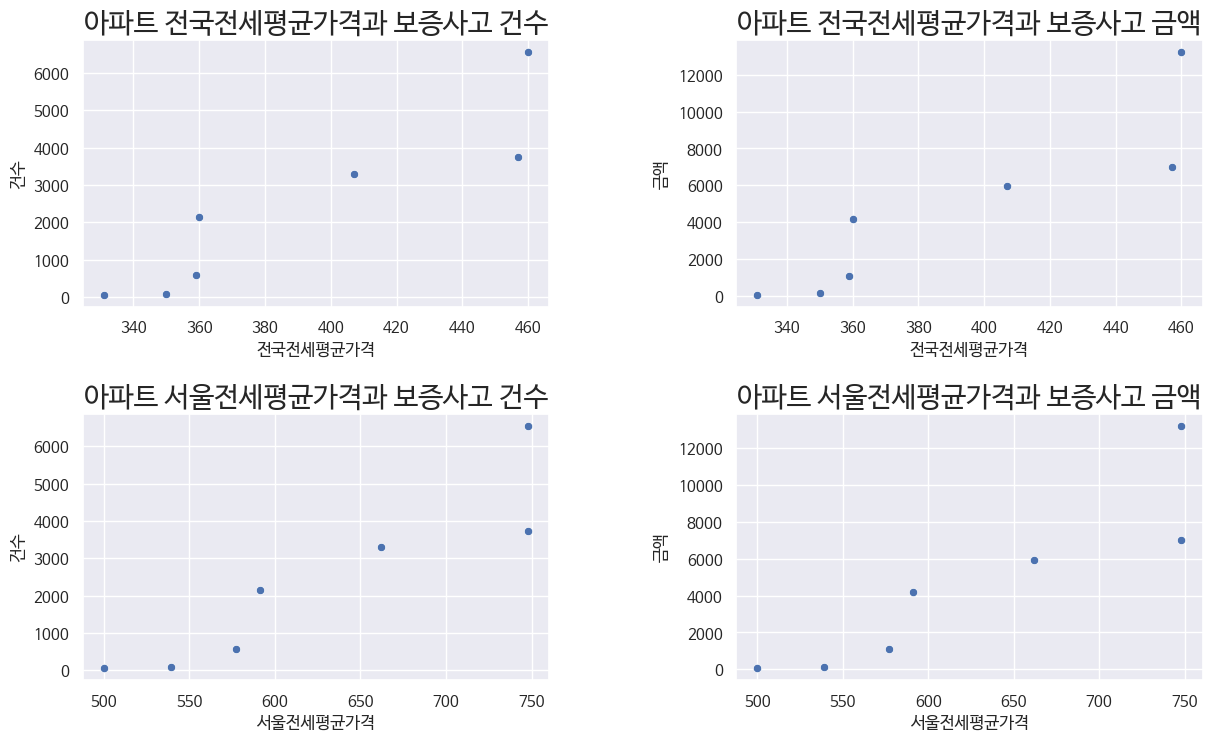

In [ ]:
# 아파트 전세평균가격과 보증사고의 상관관계

fig, axes = plt.subplots(2, 2, figsize=(14, 8))


sns.scatterplot(x='전국전세평균가격', y='건수', data=co1, ax=axes[0][0])
axes[0][0].set_title('아파트 전국전세평균가격과 보증사고 건수', fontsize=20)


sns.scatterplot(x='전국전세평균가격', y='금액', data=co1, ax=axes[0][1])
axes[0][1].set_title('아파트 전국전세평균가격과 보증사고 금액', fontsize=20)


sns.scatterplot(x='서울전세평균가격', y='건수', data=co1, ax=axes[1][0])
axes[1][0].set_title('아파트 서울전세평균가격과 보증사고 건수', fontsize=20)


sns.scatterplot(x='서울전세평균가격', y='금액', data=co1, ax=axes[1][1])
axes[1][1].set_title('아파트 서울전세평균가격과 보증사고 금액', fontsize=20)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
# 정규성 검정(p-val > 0.05)

import pingouin as pg

pg.normality(co1)

,W,pval,normal
연도,0.978002,0.949289,True
건수,0.900368,0.333217,True
금액,0.891370,0.281887,True
전국전세평균가격,0.860611,0.153307,True
서울전세평균가격,0.909471,0.392221,True


In [ ]:
# 피어슨 r 상관관계

pg.corr(co1.건수, co1.전국전세평균가격).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,7,0.918,"[0.53, 0.99]",0.004,13.85,0.909


In [ ]:
pg.corr(co1.금액, co1.전국전세평균가격).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,7,0.905,"[0.48, 0.99]",0.005,10.868,0.881


검정 결과에 따르면, p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설(서로 상관관계가 존재)을 채택합니다.

전세보증사고 건수와 금액은 전세평균가격과 r=0.9로 높은 상관관계를 가지고 있습니다.

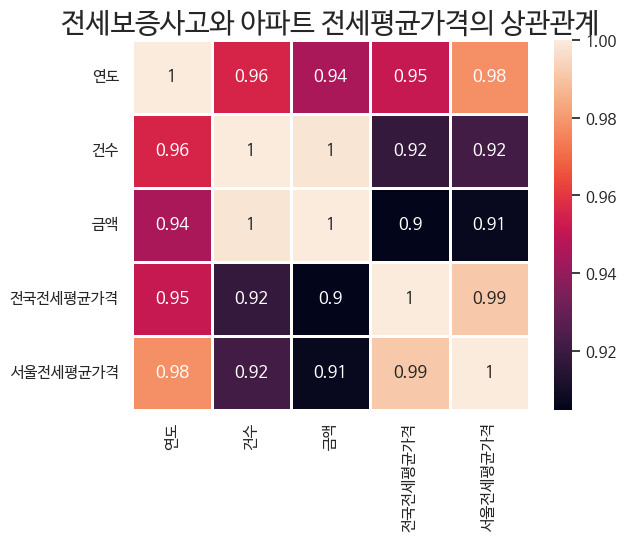

In [ ]:
plt.title('전세보증사고와 아파트 전세평균가격의 상관관계', fontsize=20)
sns.heatmap(co1.corr(), annot=True, linewidths=1)

plt.show()

In [7]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [8]:
!jupyter nbconvert --to PDF '/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/1-2. 전세사기 현황_사본.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/1-2. 전세사기 현황_사본.ipynb to PDF
[NbConvertApp] Support files will be in 1-2. 전세사기 현황_사본_files/
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Making directory ./1-2. 전세사기 현황_사본_files
[NbConvertApp] Writing 179023 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbC

In [5]:
!jupyter nbconvert --to html "/content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/1-2. 전세사기 현황_사본.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/1-2. 전세사기 현황_사본.ipynb to html
[NbConvertApp] Writing 1647093 bytes to /content/gdrive/MyDrive/Colab Notebooks/전세사기 프로젝트/1-2. 전세사기 현황_사본.html
